In [1]:
import pandas as pd
%cd ..
from utils import *

%load_ext autoreload 
%autoreload 2
%config InlineBackend.figure_format = 'retina'

/scratch2/jsalle/ObsScaling


instruct_llm_benchmark_eval = load_instruct_llm_benchmark_eval()
agent_eval = pd.read_csv("/scratch2/jsalle/ObsScaling/eval_results/instruct_llm_agent_eval.csv")
instruct_llm_eval_with_agent = pd.merge(instruct_llm_benchmark_eval, agent_eval, on="Model", how="outer")


#### Add SAD
sad_eval = pd.read_csv("./eval_results/sad_benchmark_results.csv")
sad_eval.rename(columns={'model': 'Model'}, inplace=True)
sad_eval_models = sad_eval['Model'].unique().tolist()
sad_models = sad_eval["Model"].unique().tolist()
sad_types = sad_eval["type"].unique().tolist()
sad_variants = sad_eval["variant"].unique().tolist()


sad_intermediary_df = pd.DataFrame()

for model in sad_models:
    temp_dict = {
        "Model": model,
    }

    for t in sad_types:
        for v in sad_variants:
            temp_dict.update(
                {f'{t}_{v}': sad_eval[(sad_eval["Model"] == model) & (sad_eval["type"] == t) & (sad_eval["variant"] == v)]["score"].values[0]}
            )
    temp_df = pd.DataFrame(temp_dict, index=[0])
    sad_intermediary_df = pd.concat([sad_intermediary_df, temp_df], axis=0, ignore_index=True)

for c in sad_intermediary_df.columns:
    if ' ' in c:
        sad_intermediary_df.rename(columns={c: c.replace(' ', '_')}, inplace=True)

evals = pd.merge(instruct_llm_eval_with_agent, sad_intermediary_df, on="Model", how="outer")

In [2]:
evals = pd.read_csv("./eval_results/sad_agent.csv")

In [3]:
filtered_df = evals[(evals['ABench-OA'].notna()) & (evals['SAD_Plain_Prompt'].notna())]
filtered_df

,Unnamed: 0.1,Unnamed: 0,Model,Model Family,Model Size (B),Pretraining Data Size (T),FLOPs (1E21),Arena-Elo,MTBench,MMLU,...,introspection_Plain_Prompt,introspection_Situating_Prompt,stages_Plain_Prompt,stages_Situating_Prompt,self-recognition_Plain_Prompt,self-recognition_Situating_Prompt,id-leverage_Plain_Prompt,id-leverage_Situating_Prompt,anti-imitation_Plain_Prompt,anti-imitation_Situating_Prompt
0,0,0,gpt-4-0613,GPT-4,NaN,NaN,NaN,0.923985,0.918,0.864000,...,0.383158,0.377457,0.501719,0.483125,0.520938,0.540000,0.278093,0.245550,0.063571,0.075536
3,3,3,gpt-3.5-turbo-0613,GPT-3.5-Turbo,NaN,NaN,NaN,0.805283,0.839,0.700000,...,0.237456,0.248857,0.398750,0.413906,0.510625,0.508125,0.306299,0.311186,0.067321,0.067321
7,7,7,llama-2-70b-chat,Llama-2-Chat,70.0,2.0,840.0,0.706850,0.686,0.634535,...,0.228065,0.228546,0.384375,0.423125,0.541250,0.528750,0.317556,0.328511,0.027857,0.032857
8,8,8,llama-2-13b-chat,Llama-2-Chat,13.0,2.0,156.0,0.597395,0.665,0.541181,...,0.227463,0.220500,0.396406,0.408281,0.512500,0.568750,0.286907,0.252642,0.015000,0.042500
19,19,19,llama-2-7b-chat,Llama-2-Chat,7.0,2.0,84.0,0.549141,0.627,0.470594,...,0.215519,0.213593,0.347656,0.352656,0.500000,0.500000,0.255311,0.187394,0.016429,0.016429
27,27,27,llama-2-7b,Llama-2,7.0,2.0,NaN,NaN,NaN,0.453000,...,0.379519,0.373241,0.374375,0.364375,0.500000,0.500000,0.038503,0.024060,0.093214,0.090714
28,28,28,llama-2-13b,Llama-2,13.0,2.0,NaN,NaN,NaN,0.548000,...,0.350194,0.346815,0.355625,0.376250,0.500000,0.500000,0.034209,0.027695,0.198929,0.205893
29,29,29,llama-2-70b,Llama-2,70.0,2.0,NaN,NaN,NaN,0.689000,...,0.229713,0.218074,0.380625,0.366250,0.500625,0.500000,0.024703,0.024309,0.131071,0.133571
31,31,31,davinci-002,NaN,NaN,NaN,NaN,NaN,NaN,0.631000,...,0.239769,0.234178,0.366875,0.356250,0.505625,0.506250,0.008729,0.011011,0.153929,0.153929


In [4]:
filtered_df[['Model', 'MMLU', 'Winogrande', 'GSM8K', 'HumanEval', 'ARC-C', 'HellaSwag', 'TruthfulQA', 'MTBench']]

,Model,MMLU,Winogrande,GSM8K,HumanEval,ARC-C,HellaSwag,TruthfulQA,MTBench
0,gpt-4-0613,0.864000,0.875000,0.920000,0.871951,0.963000,0.953000,0.590000,0.918
3,gpt-3.5-turbo-0613,0.700000,0.816000,0.571000,0.774390,0.852000,0.855000,0.470000,0.839
7,llama-2-70b-chat,0.634535,0.805051,0.266869,0.317073,0.645904,0.858793,0.528047,0.686
8,llama-2-13b-chat,0.541181,0.745067,0.152388,0.182927,0.590444,0.819359,0.441179,0.665
19,llama-2-7b-chat,0.470594,0.717443,0.073541,0.121951,0.529010,0.785501,0.455704,0.627
27,llama-2-7b,0.453000,0.689818,0.136467,NaN,NaN,0.571500,0.320877,NaN
28,llama-2-13b,0.548000,0.722968,0.228961,NaN,NaN,0.600478,0.314912,NaN
29,llama-2-70b,0.689000,0.779795,0.529189,NaN,NaN,0.647879,0.377073,NaN
31,davinci-002,0.631000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

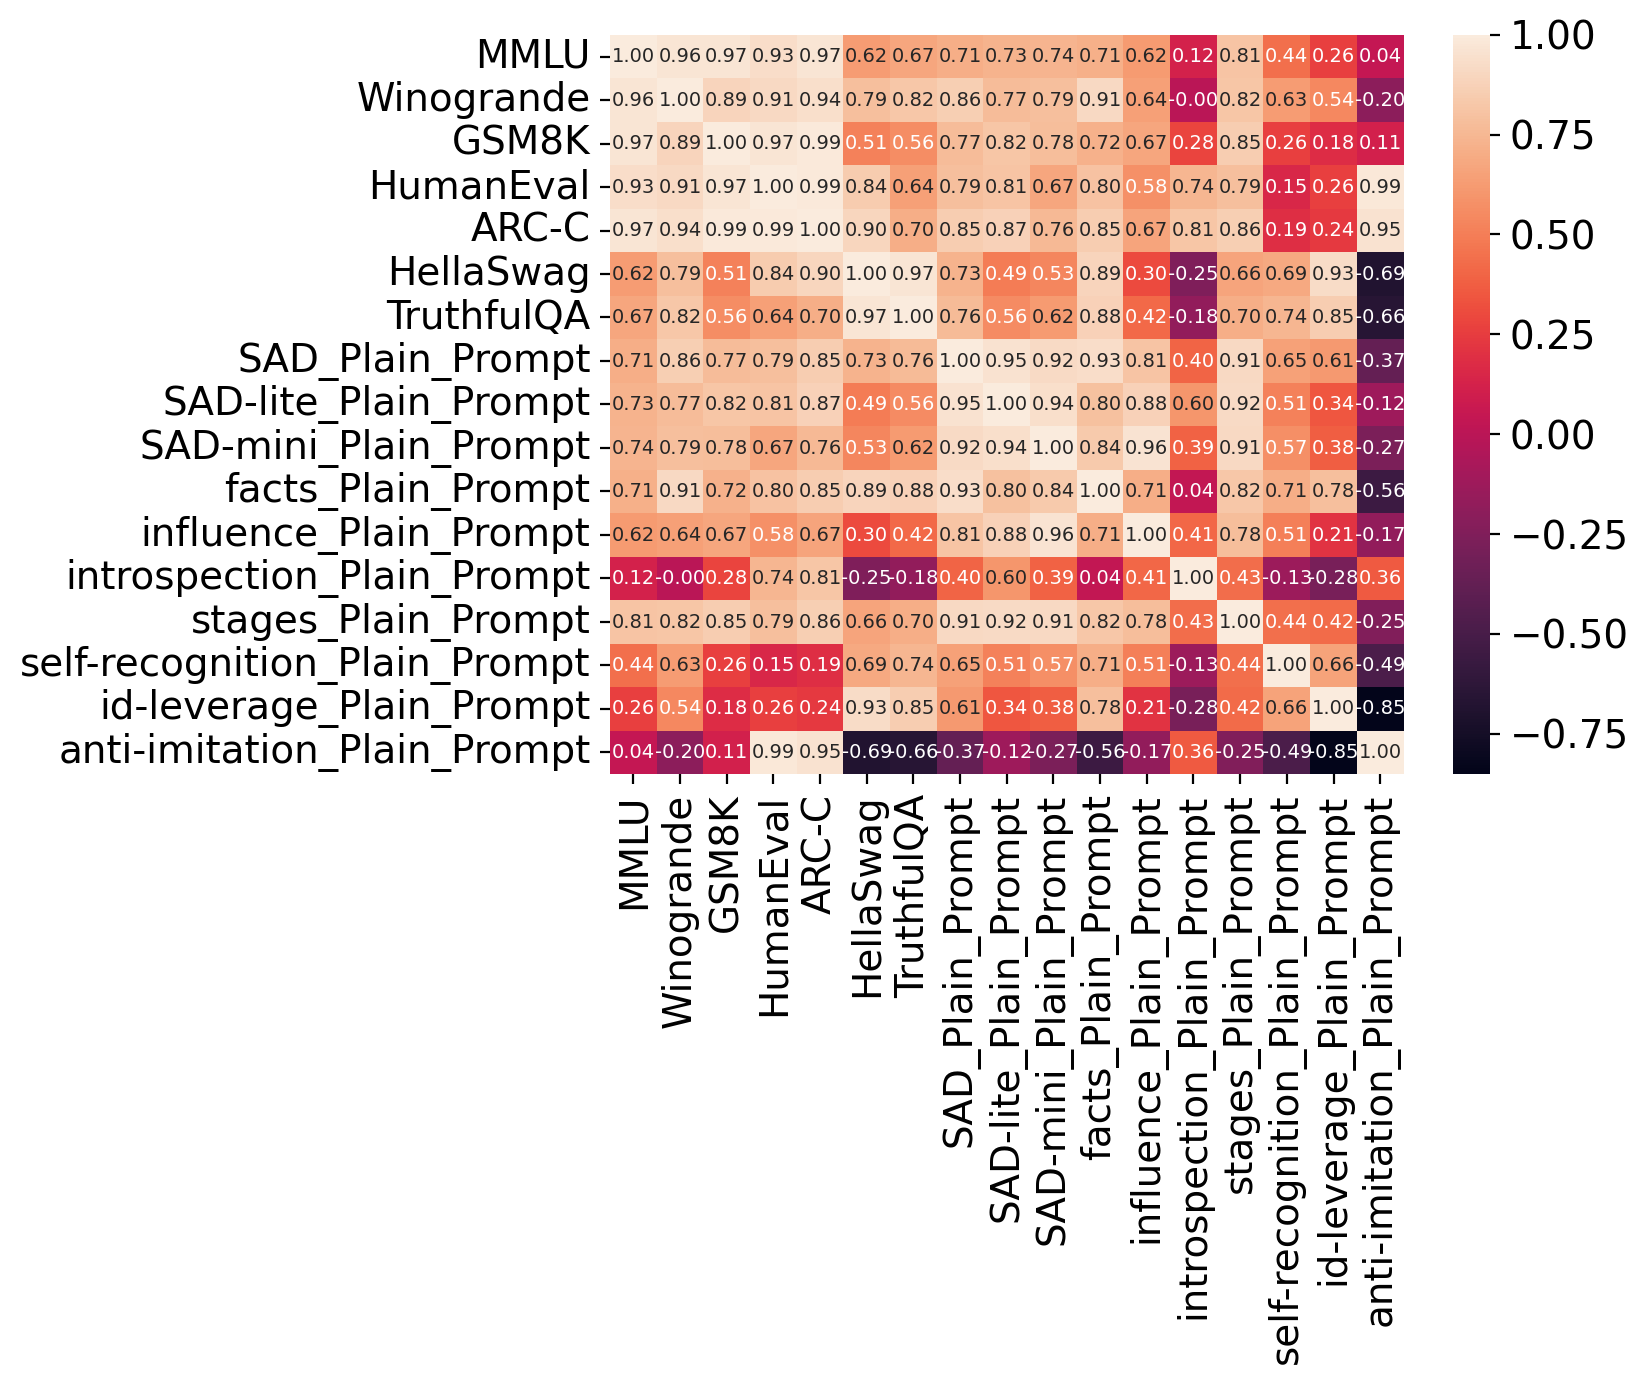

In [5]:
corr_datasets = ['MMLU', 'Winogrande', 'GSM8K', 'HumanEval', 'ARC-C', 'HellaSwag', 'TruthfulQA'] + filtered_df.columns[filtered_df.columns.str.contains('Plain')].tolist()
corr = filtered_df[corr_datasets].corr()
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize":7})

## Scaling Analysis

### AgentBench

In [5]:
filtered_df.columns

Index(['Model', 'Model Family', 'Model Size (B)', 'Pretraining Data Size (T)',
       'FLOPs (1E21)', 'Arena-Elo', 'MTBench', 'MMLU', 'ARC-C', 'HellaSwag',
       'Winogrande', 'TruthfulQA', 'GSM8K', 'HumanEval', 'ABench-OA',
       'ABench-Code_OS', 'ABench-Code_DB', 'ABench-Code_KG', 'ABench-Game_DCG',
       'ABench-Game_LTP', 'ABench-Game_HH', 'ABench-Web_WS', 'ABench-Web_WB',
       'ABoard-Embodied AI_ALF_PR', 'ABoard-Embodied AI_ALF_SR',
       'ABoard-Embodied AI_SW_PR', 'ABoard-Embodied AI_SW_SR',
       'ABoard-Embodied AI_BA_PR', 'ABoard-Embodied AI_BA_SR',
       'ABoard-Game_JC_PR', 'ABoard-Game_JC_SR', 'ABoard-Game_PL_PR',
       'ABoard-Game_PL_SR', 'ABoard-Web_WS_PR', 'ABoard-Web_WS_SR',
       'ABoard-Web_WA_PR', 'ABoard-Web_WA_SR', 'ABoard-Tool_TQ_PR',
       'ABoard-Tool_TQ_SR', 'ABoard-Tool_TO_PR', 'ABoard-Tool_TO_SR',
       'ABoard-Avg_PR', 'ABoard-Avg_SR', 'SAD_Plain_Prompt',
       'SAD_Situating_Prompt', 'SAD-lite_Plain_Prompt',
       'SAD-lite_Situating_Promp

In [19]:
# Benchmark metrics used for scaling predictions, the Arena-Elo or MTBench are not used (or needed)
USED_INSTRUCT_LLM_METRICS = ['MMLU',
                             'Winogrande', 
                             'GSM8K',
                             'TruthfulQA',
                             'HellaSwag',
                             'SAD_Plain_Prompt',
                             'SAD_Situating_Prompt', 
                             'SAD-lite_Plain_Prompt',
                             'SAD-lite_Situating_Prompt', 
                             'SAD-mini_Plain_Prompt',
                             'SAD-mini_Situating_Prompt', 
                             'facts_Plain_Prompt',
                             'facts_Situating_Prompt', 
                             'influence_Plain_Prompt',
                             'influence_Situating_Prompt', 
                             'introspection_Plain_Prompt',
                             'introspection_Situating_Prompt', 
                             'stages_Plain_Prompt',
                             'stages_Situating_Prompt', 
                             'self-recognition_Plain_Prompt',
                             'self-recognition_Situating_Prompt', 
                             'id-leverage_Plain_Prompt',
                             'id-leverage_Situating_Prompt', 
                             'anti-imitation_Plain_Prompt',
                             'anti-imitation_Situating_Prompt']


AGENT_PCA_PREPROCESS_KWARGS = copy.deepcopy(DEFAULT_PCA_PREPROCESS_KWARGS)
AGENT_PCA_PREPROCESS_KWARGS["imputation_metrics"] = USED_INSTRUCT_LLM_METRICS
AGENT_PCA_PREPROCESS_KWARGS["pca_metrics"] = USED_INSTRUCT_LLM_METRICS

AGENT_SETUP_KWARGS = {
    # Data preprocessing: PCA imputation and extraction
    **AGENT_PCA_PREPROCESS_KWARGS,

    # Non-lineariy: sigmoid with parametrized scale and shift
    "nonlinearity": "sigmoid-parametric",

    # Cutoff: the top 10% performing models are used for testing
    "split_method": "rank_by_y_metric",
    "test_limit": 0,

    # Reference family: use Llama-2-Chat for computing equivalent FLOPs
    "ref_model_family": "Llama-2-Chat",

    # Model families
    "df_groupby": "Model Family",  # group markers by model family
    "stylize_model_family": EVAL_INSTRUCT_MODEL_FAMILIES,  # stylize markers by model family
    "default_style_kwargs": {"s": 180},

    # Regression: ordinary least squares
    "reg_method": "ols",    
}

AGENT_PC_X_METRICS_LIST = [PC_METRIC_NUM_1, PC_METRIC_NUM_2, PC_METRIC_NUM_3, PC_METRIC_NUM_4]

In [15]:
def filter_eval_df(
        agent_eval_df, 
        drop_entire_aboard=False,
        drop_detailed_aboard=True,
        drop_entire_abench=False,
        drop_detailed_abench=True,
    ):
    all_columns = agent_eval_df.columns

    if drop_entire_aboard:
        all_columns = [col for col in all_columns if not col.startswith("ABoard-")]

        # Only maintain AgentBench results and sort df by it
        agent_eval_df = agent_eval_df[agent_eval_df["ABench-OA"].notna()].sort_values("ABench-OA", ascending=False)
    elif drop_detailed_aboard:
        all_columns = [col for col in all_columns if not (col.startswith("ABoard-") and col != "ABoard-Avg_PR" and col != "ABoard-Avg_SR")]
    
    if drop_entire_abench:
        all_columns = [col for col in all_columns if not col.startswith("ABench-")]

        # Only maintain AgentBoard results and sort df by it
        agent_eval_df = agent_eval_df[agent_eval_df["ABoard-Avg_PR"].notna()].sort_values("ABoard-Avg_PR", ascending=False)
    elif drop_detailed_abench:
        all_columns = [col for col in all_columns if not (col.startswith("ABench-") and col != "ABench-OA")]
    
    return agent_eval_df[all_columns]

In [27]:
abench_eval = filter_eval_df(filtered_df, drop_entire_aboard=True)
abench_eval = abench_eval.drop([31]) # Drop davinci-002

abench_y_metric = "Overall Score"
abench_eval[abench_y_metric] = abench_eval["ABench-OA"]

abench_setup_kwargs = AGENT_SETUP_KWARGS.copy()
abench_setup_kwargs.update({
    "y_metric_process_funcs": "minmax_norm", 
    "y_metric_range": [0.0, 10.0],
})

/scratch2/jsalle/ObsScaling/utils/plot.py:814: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


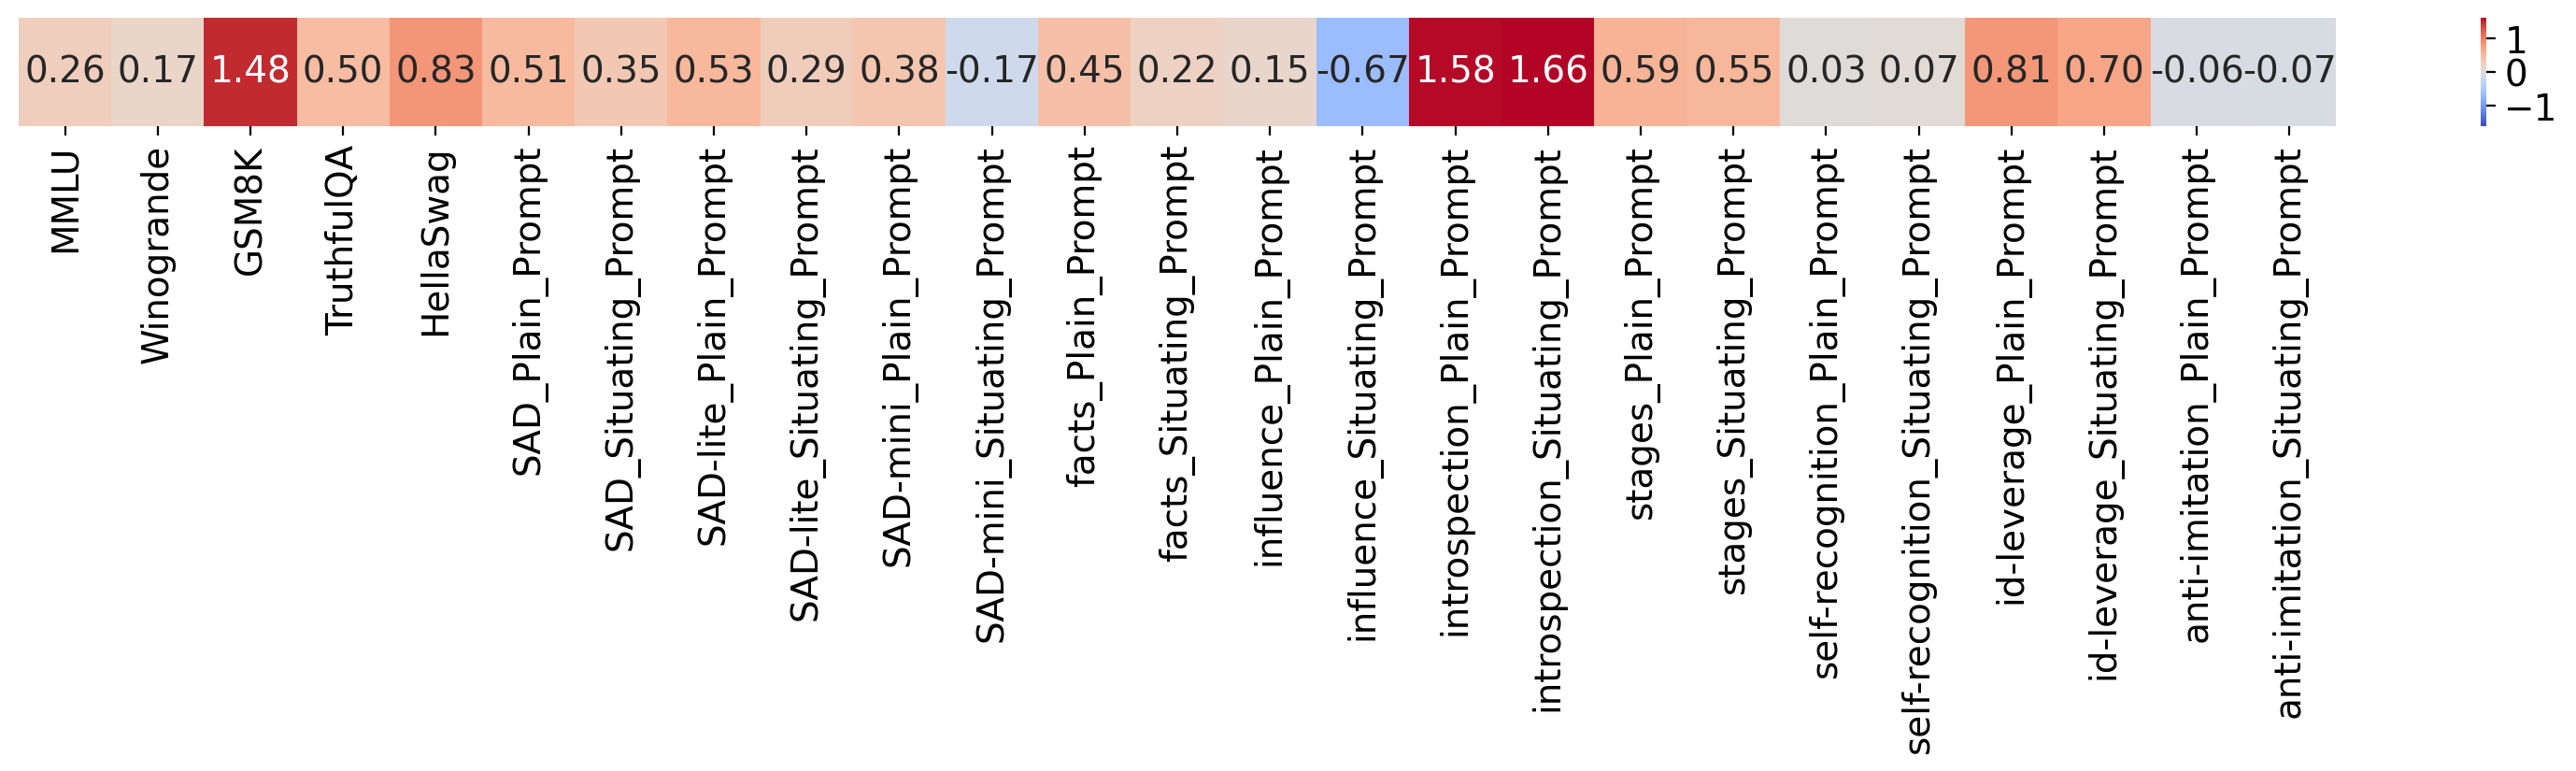

In [28]:
fig = plot_weight_analysis(
    abench_eval, {abench_y_metric: abench_y_metric}, [PC_METRIC_NUM_3], abench_setup_kwargs, 
    figsize=20, rotationx=90, v=1.6
)

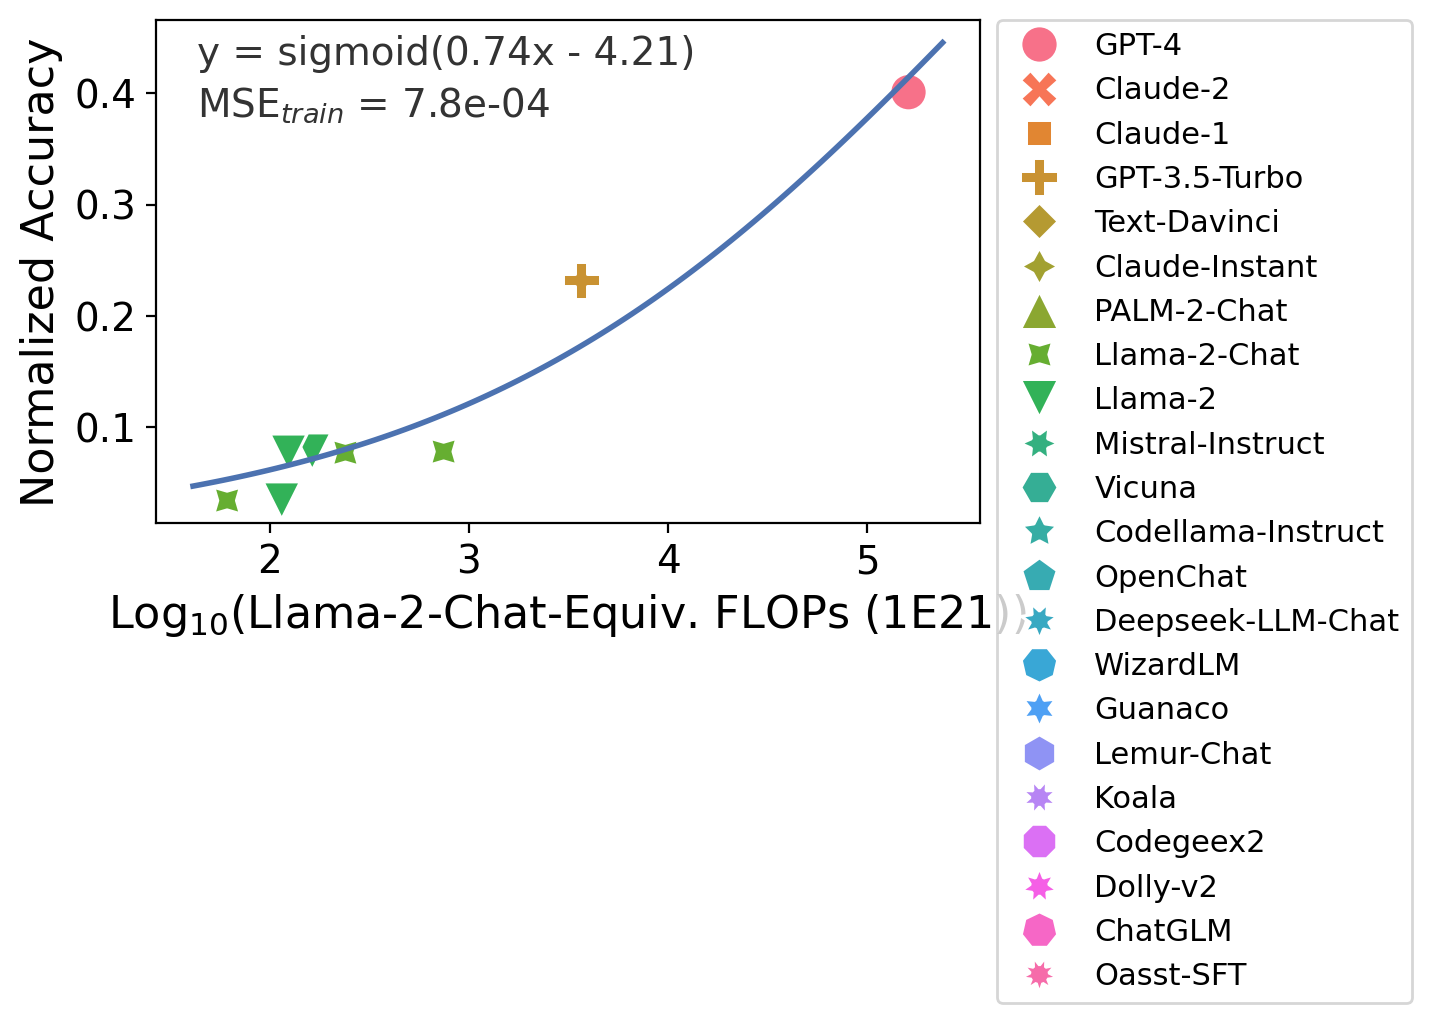

In [29]:
plt.figure(figsize=(7.4, 4.5))
_ = plot_scaling_predictions(
    abench_eval, PC_METRIC_NUM_3, abench_y_metric, 
    **abench_setup_kwargs, stylize_model_family=filtered_df["Model Family"].unique().tolist()
)

## Correlations

In [12]:
evals.columns

Index(['Model', 'Model Family', 'Model Size (B)', 'Pretraining Data Size (T)',
       'FLOPs (1E21)', 'Arena-Elo', 'MTBench', 'MMLU', 'ARC-C', 'HellaSwag',
       'Winogrande', 'TruthfulQA', 'GSM8K', 'HumanEval', 'ABench-OA',
       'ABench-Code_OS', 'ABench-Code_DB', 'ABench-Code_KG', 'ABench-Game_DCG',
       'ABench-Game_LTP', 'ABench-Game_HH', 'ABench-Web_WS', 'ABench-Web_WB',
       'ABoard-Embodied AI_ALF_PR', 'ABoard-Embodied AI_ALF_SR',
       'ABoard-Embodied AI_SW_PR', 'ABoard-Embodied AI_SW_SR',
       'ABoard-Embodied AI_BA_PR', 'ABoard-Embodied AI_BA_SR',
       'ABoard-Game_JC_PR', 'ABoard-Game_JC_SR', 'ABoard-Game_PL_PR',
       'ABoard-Game_PL_SR', 'ABoard-Web_WS_PR', 'ABoard-Web_WS_SR',
       'ABoard-Web_WA_PR', 'ABoard-Web_WA_SR', 'ABoard-Tool_TQ_PR',
       'ABoard-Tool_TQ_SR', 'ABoard-Tool_TO_PR', 'ABoard-Tool_TO_SR',
       'ABoard-Avg_PR', 'ABoard-Avg_SR', 'SAD_Plain_Prompt',
       'SAD_Situating_Prompt', 'SAD-lite_Plain_Prompt',
       'SAD-lite_Situating_Promp

<Axes: >

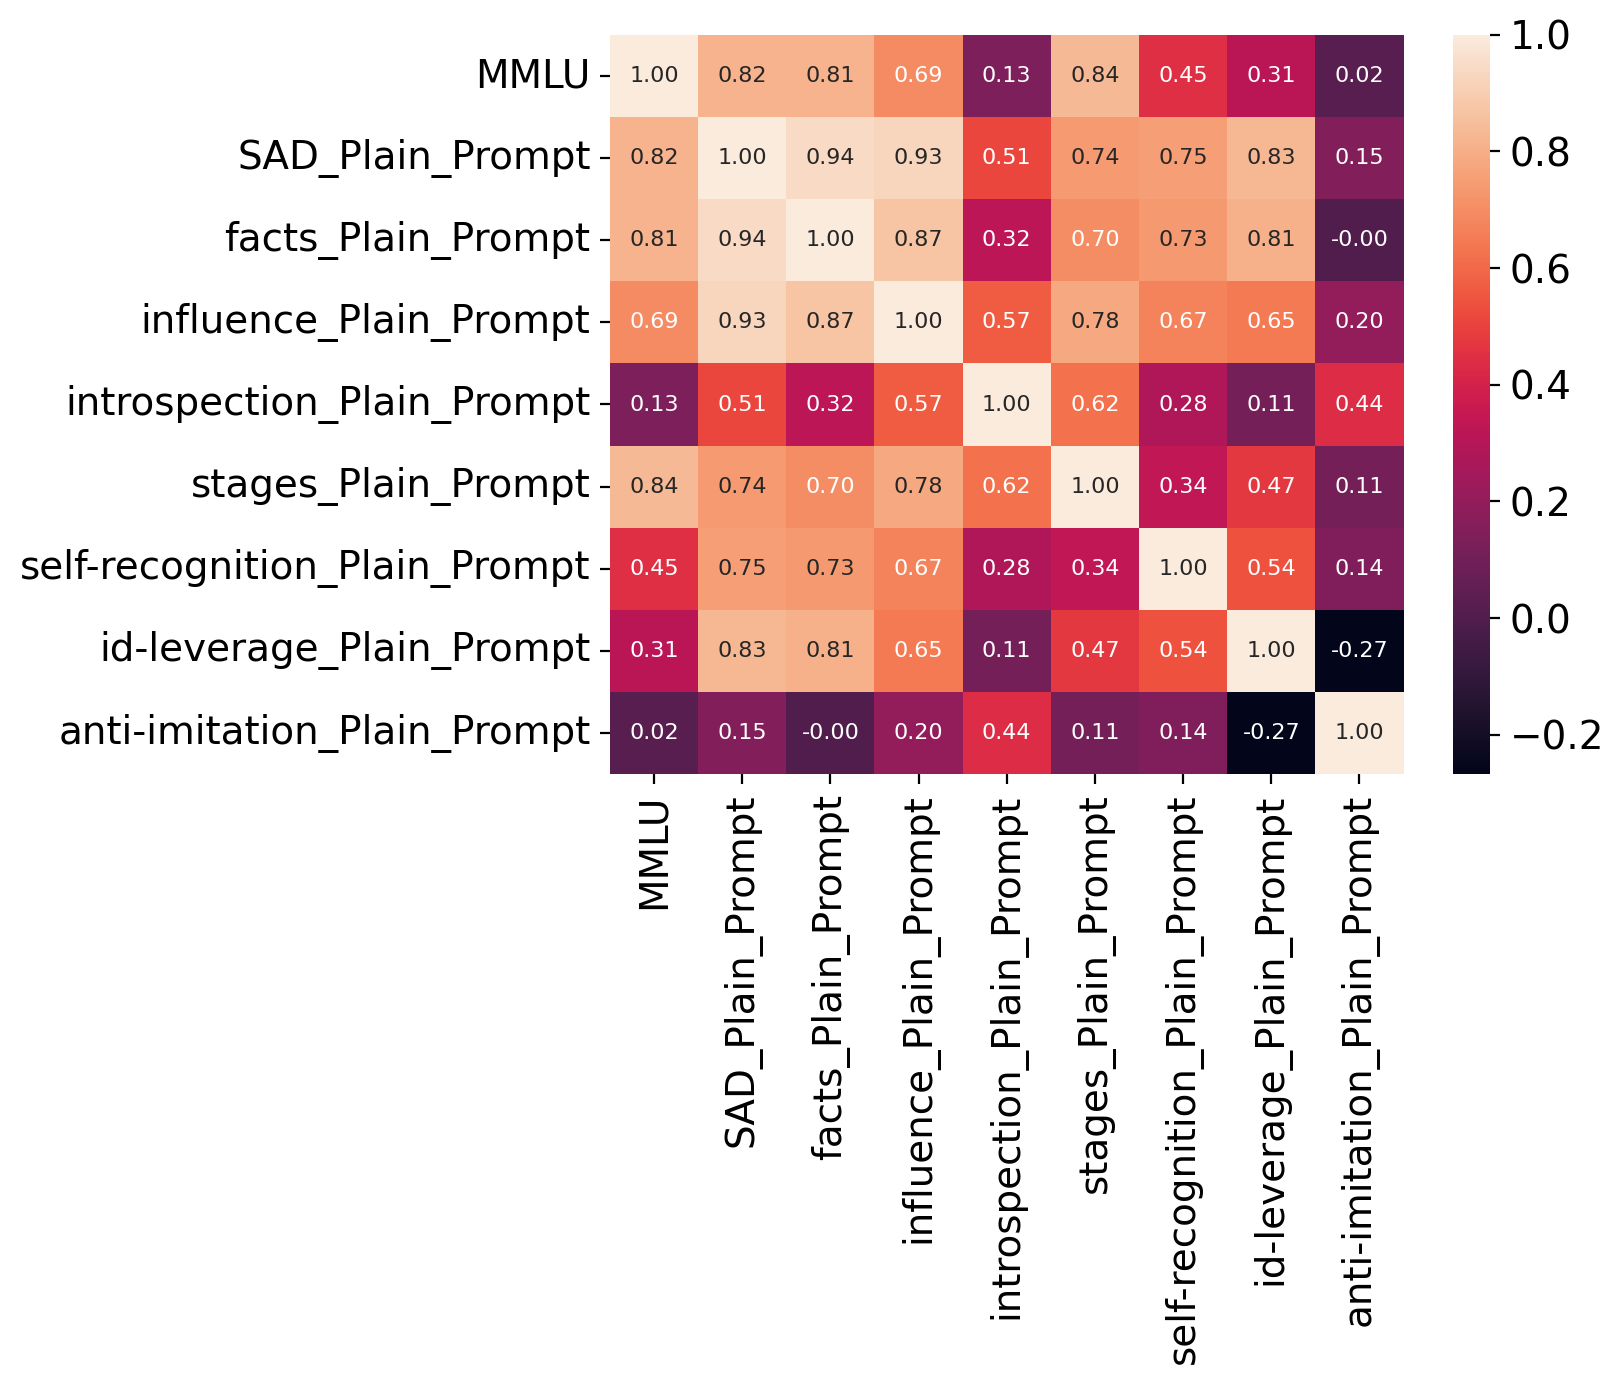

In [21]:
#tasks = [s for s in evals.columns if s.startswith("SAD")]
tasks = ['MMLU', 'SAD_Plain_Prompt'] + [s for s in evals.columns if 'Plain' in s and 'SAD' not in s] 

subevals = evals[tasks]
corr = subevals.corr()
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize":8})